In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
X = glass.drop(columns = ['Type'])
Y = glass['Type']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## HoldOutCroosVaildation

#### 비복원 추출 방법으로 랜덤하게  훈련데이터(Train data)와 평가 데이터(Test data)로 나눠 검증하는 기법이다.
#### 훈련 데이터로 분석 모형을 구축하고, 평가 데이터로 분석 모형을 평가한다.
#### 계산량이 많지 않아 모형을 쉽게 평가 할 수 있는 장점이 있으나 전체 데이터에서 평가데이터를 훈련 데이터로 사용할 수 없어 데이터 손실이 일어날 수 있는 단점이 존재한다.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.svm import RandomForestClassifier

ran = RandomForestClassifier()
ran.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
ran.score(X_train, y_train)

1.0

In [11]:
ran.score(X_test, y_test)

0.6615384615384615

## K-fold Cross validation

#### 데이터 집합을 무작위로 동일 크기를 갖는 K개의 부분 집합으로 나누고, 그중 1개를 Test Data로 나머지(K-1)개 집합을 Train Data로 선정하여 분석 모형을 평가한다.
#### 모든 데이터를 훈련과 평가에 사용할 수 있으나, K값이 너무 커지면 수행 시간과 계산량이 많아진다.
#### K번 반복하여 결과를 K에 다수결 또는 평균으로 분석한다.

In [23]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier()

kf = KFold(n_splits = 5)
for train, test in kf.split(X):
    print("%s %s" % (len(train), len(test)))

171 43
171 43
171 43
171 43
172 42


In [24]:
train_score = []
test_score = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = Y[train], Y[test]
    ran.fit(X_train, y_train)
    train_score.append(ran.score(X_train, y_train))
    test_score.append(ran.score(X_test, y_test))
print(train_score)
print(np.mean(train_score))
print(test_score)
print(np.mean(test_score))


[1.0, 1.0, 1.0, 1.0, 1.0]
1.0
[0.20930232558139536, 0.4418604651162791, 0.37209302325581395, 0.32558139534883723, 0.023809523809523808]
0.2745293466223699


In [25]:
from sklearn.model_selection import cross_val_score
# k-fold Cross validation을 통한 모델 정확도 추출
# cv에 입력된 cross validation을 실시하고 정확도 추출
scores = cross_val_score(ran, X, Y, cv =5)
scores

array([0.72093023, 0.69767442, 0.69767442, 0.55813953, 0.78571429])

In [26]:
print("score mean : %0.2f, standard division : %0.2f" %(scores.mean(), scores.std()))

score mean : 0.69, standard division : 0.07


In [27]:
from sklearn import metrics

scores = cross_val_score(ran, X, Y, cv =5, scoring = 'f1_macro')
scores

array([0.77287785, 0.66666667, 0.61259639, 0.63325282, 0.61070381])

In [28]:
print("score mean : %0.2f, standard division : %0.2f" %(scores.mean(), scores.std()))

score mean : 0.66, standard division : 0.06


## Repeated K-Fold

In [38]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits = 5, n_repeats = 2)
for train, test in rkf.split(X):
    print("%s, %s" %(len(train), len(test)))
    #print("%s, %s" %(train, test))

171, 43
171, 43
171, 43
171, 43
172, 42
171, 43
171, 43
171, 43
171, 43
172, 42


## Leave-One-Out Cross validation
#### 전체 데이터 N개에서 1개의 샘플만을 평가 데이터에 사용하고 나머지 (N-1)개는 훈련 데이터로 사용하는 과정을 N번 반복하는 교차 검증 기법이다.
#### K-fold와 같은 방법을 사용하며, 이때 K는 전체 데이터 N과 같다(K=N)
#### 가능한 한 많은 데이터를 훈련에 사용할 수 있지만, 수행시간과 계산량이 많고 작은 크기의 데이터에 사용하기 좋다.

In [33]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train, test in loo.split(X):
    if test == 5:
        break
    print("%s, %s" %(len(train), len(test)))

213, 1
213, 1
213, 1
213, 1
213, 1


In [36]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

print(str(datetime.today().hour) + ':' + str(datetime.today().minute) + ":" + str(datetime.today().second))

train_score = []
test_score = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    ran.fit(X_train, Y_train)
    train_score.append(ran.score(X_train, Y_train))
    test_score.append(ran.score(X_test, Y_test))
print(str(datetime.today().hour) + ':' + str(datetime.today().minute) + ":" + str(datetime.today().second))
print(np.mean(train_score))
print(np.mean(test_score))

16:19:42
16:20:17
1.0
0.794392523364486


## Leave-p-Out Cross Validation
#### LOOCV에서 1개의 샘플이 아닌 p개의 샘플을 Test Data로 사용하는 검증 기법이다.
#### nCp 만큼 교차 검증이 실행되므로 계산시간에 대한 부담이 크다.

In [37]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(p=5)

for train, test in lpo.split(X):
    if test[4] == 10:
        break
    print("%s, %s" %(len(train), len(test)))



209, 5
209, 5
209, 5
209, 5
209, 5
209, 5


In [38]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(p=5)

print(str(datetime.today().hour) + ':' + str(datetime.today().minute) + ":" + str(datetime.today().second))

train_score = []
test_score = []
for train_index, test_index in lpo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    ran.fit(X_train, Y_train)
    train_score.append(ran.score(X_train, Y_train))
    test_score.append(ran.score(X_test, Y_test))
print(str(datetime.today().hour) + ':' + str(datetime.today().minute) + ":" + str(datetime.today().second))
print(len(train_score))
print(np.mean(train_score))
print(len(test_score))
print(np.mean(test_score))

16:20:35


KeyboardInterrupt: 

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [40]:
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier()

ran.fit(X_train, y_train)

y_pred = ran.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6461538461538462

In [43]:
accuracy_score(y_test, y_pred, normalize=False)
#normalize = False 이면 올바르게 분류가 된 데이터의 수를 반환

42

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[16,  5,  0,  0,  0,  0],
       [ 8, 15,  0,  1,  1,  1],
       [ 5,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

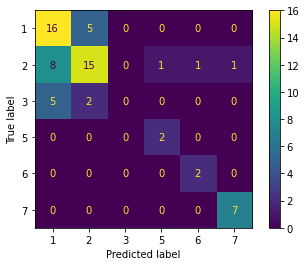

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=ran.classes_),
                              display_labels=ran.classes_)
disp.plot()
plt.show()

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.76      0.64        21
           2       0.68      0.58      0.62        26
           3       0.00      0.00      0.00         7
           5       0.67      1.00      0.80         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.65        65
   macro avg       0.57      0.72      0.63        65
weighted avg       0.59      0.65      0.61        65



In [52]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test, y_pred))

[[[31 13]
  [ 5 16]]

 [[32  7]
  [11 15]]

 [[58  0]
  [ 7  0]]

 [[62  1]
  [ 0  2]]

 [[62  1]
  [ 0  2]]

 [[57  1]
  [ 0  7]]]


In [53]:
mul_matrix = multilabel_confusion_matrix(y_test, y_pred)

In [54]:
mul_matrix[0]

array([[31, 13],
       [ 5, 16]], dtype=int64)